In [34]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis

import numpy as np
import pandas as pd
from scipy import interpolate
import random

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook


from os import path
import logging

In [2]:
pd.options.display.max_columns = None

In [3]:
# loading training data

# if you are on a windows machine un-comment the following line to get the path to training data
# here = !echo %cd%

# if you are on a mac/ unix machine un-comment the following line to get the path to training data
here = !pwd

test_data_path = path.join(path.dirname(here[0]), "unlabeled_data.csv")
eis_data = eis_dataframe_from_csv(test_data_path)

In [4]:
def complex_parts(cmp: pd.Series) -> tuple[pd.Series, pd.Series]:
    real_part= cmp.apply(np.real)
    imag_part= cmp.apply(np.imag)
    return (real_part, imag_part)

eis_data["Z_real"], eis_data["Z_imag"] = complex_parts(eis_data.Z)
display(eis_data)

,freq,Z,Z_real,Z_imag
0,"[0.0628318531, 0.0929806621, 0.137595871, 0.20...","[(107.98943481-1.91760783e-06j), (107.98943465...","[107.98943481, 107.98943465, 107.98943442, 107...","[-1.91760783e-06, -2.69814865e-06, -3.79637798..."
1,"[6.28318531, 8.44794926, 11.3585456, 15.271938...","[(1374.66297214-5.24696677j), (1374.10472855-6...","[1374.66297214, 1374.10472855, 1373.40544826, ...","[-5.24696677, -6.53835458, -8.14579098, -10.14..."
2,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(0.30615453-0.00051099j), (0.30615039-0.00075...","[0.30615453, 0.30615039, 0.30614129, 0.3061213...","[-0.00051099, -0.00075703, -0.00112147, -0.001..."
3,"[0.0628318531, 0.0930918317, 0.137925092, 0.20...","[(185.15770678-55.35496519j), (168.10345657-68...","[185.15770678, 168.10345657, 144.77139506, 116...","[-55.35496519, -68.43230329, -79.23399855, -84..."
4,"[0.0628318531, 0.0935613619, 0.139319915, 0.20...","[(40238.7753-1100.82284j), (40129.9244-1565.21...","[40238.7753, 40129.9244, 39956.838, 39675.02, ...","[-1100.82284, -1565.2135, -2220.09383, -3136.6..."
...,...,...,...,...
18563,"[0.628318531, 0.843820445, 1.13323563, 1.52191...","[(62.14772073-92.1546178j), (47.64383029-77.29...","[62.14772073, 47.64383029, 36.62207005, 28.319...","[-92.1546178, -77.297139, -63.9647183, -52.393..."
18564,"[62.8318531, 94.3727336, 141.74678, 212.902062...","[(22.78791653-3.955636e-05j), (22.78790763-4.8...","[22.78791653, 22.78790763, 22.7878967, 22.7878...","[-3.955636e-05, -4.85689891e-05, -5.96246792e-..."
18565,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(699.42110996-88.73395903j), (676.84357948-10...","[699.42110996, 676.84357948, 649.12740737, 615...","[-88.73395903, -105.21733551, -122.95528022, -..."
18566,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(4356.04592034-8696.39674j), (3306.44002566-6...","[4356.04592034, 3306.44002566, 2514.71330434, ...","[-8696.39674, -6582.04052, -4980.63831, -3768...."


In [5]:
from typing import Set
from itertools import chain

def freq_set(cmp: pd.Series) -> Set:
    result = set(chain.from_iterable(cmp))
    
    return result

len(freq_set(eis_data.freq))



2146

In [6]:
def freq_cat_choi(freq_array):
    bins = [
        0.01,
        10,
        10_000,
        100_000,
        2_000_000
    ]
    res=np.digitize(freq_array, bins, right=False)
    return res
    

In [7]:
def drange(cmp: pd.Series) -> tuple[pd.Series, pd.Series]:
    min_= cmp.apply(np.min)
    max_= cmp.apply(np.max)
    return (min_, max_)

eis_data["freq_min"], eis_data["freq_max"] = drange(eis_data.freq)
display(eis_data)

,freq,Z,Z_real,Z_imag,freq_min,freq_max
0,"[0.0628318531, 0.0929806621, 0.137595871, 0.20...","[(107.98943481-1.91760783e-06j), (107.98943465...","[107.98943481, 107.98943465, 107.98943442, 107...","[-1.91760783e-06, -2.69814865e-06, -3.79637798...",0.062832,6.283185e+06
1,"[6.28318531, 8.44794926, 11.3585456, 15.271938...","[(1374.66297214-5.24696677j), (1374.10472855-6...","[1374.66297214, 1374.10472855, 1373.40544826, ...","[-5.24696677, -6.53835458, -8.14579098, -10.14...",6.283185,1.253660e+07
2,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(0.30615453-0.00051099j), (0.30615039-0.00075...","[0.30615453, 0.30615039, 0.30614129, 0.3061213...","[-0.00051099, -0.00075703, -0.00112147, -0.001...",0.628319,6.283185e+06
3,"[0.0628318531, 0.0930918317, 0.137925092, 0.20...","[(185.15770678-55.35496519j), (168.10345657-68...","[185.15770678, 168.10345657, 144.77139506, 116...","[-55.35496519, -68.43230329, -79.23399855, -84...",0.062832,6.283185e+05
4,"[0.0628318531, 0.0935613619, 0.139319915, 0.20...","[(40238.7753-1100.82284j), (40129.9244-1565.21...","[40238.7753, 40129.9244, 39956.838, 39675.02, ...","[-1100.82284, -1565.2135, -2220.09383, -3136.6...",0.062832,1.253660e+07
...,...,...,...,...,...,...
18563,"[0.628318531, 0.843820445, 1.13323563, 1.52191...","[(62.14772073-92.1546178j), (47.64383029-77.29...","[62.14772073, 47.64383029, 36.62207005, 28.319...","[-92.1546178, -77.297139, -63.9647183, -52.393...",0.628319,1.253660e+07
18564,"[62.8318531, 94.3727336, 141.74678, 212.902062...","[(22.78791653-3.955636e-05j), (22.78790763-4.8...","[22.78791653, 22.78790763, 22.7878967, 22.7878...","[-3.955636e-05, -4.85689891e-05, -5.96246792e-...",62.831853,1.253660e+07
18565,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(699.42110996-88.73395903j), (676.84357948-10...","[699.42110996, 676.84357948, 649.12740737, 615...","[-88.73395903, -105.21733551, -122.95528022, -...",0.628319,6.283185e+06
18566,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(4356.04592034-8696.39674j), (3306.44002566-6...","[4356.04592034, 3306.44002566, 2514.71330434, ...","[-8696.39674, -6582.04052, -4980.63831, -3768....",0.628319,6.283185e+06


In [8]:
eis_data["Z_real_min"], eis_data["Z_real_max"] = drange(eis_data.Z_real)
eis_data["Z_imag_min"], eis_data["Z_imag_max"] = drange(eis_data.Z_imag)

display(eis_data)

,freq,Z,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max
0,"[0.0628318531, 0.0929806621, 0.137595871, 0.20...","[(107.98943481-1.91760783e-06j), (107.98943465...","[107.98943481, 107.98943465, 107.98943442, 107...","[-1.91760783e-06, -2.69814865e-06, -3.79637798...",0.062832,6.283185e+06,100.013482,107.989435,-4.504606,-0.000002
1,"[6.28318531, 8.44794926, 11.3585456, 15.271938...","[(1374.66297214-5.24696677j), (1374.10472855-6...","[1374.66297214, 1374.10472855, 1373.40544826, ...","[-5.24696677, -6.53835458, -8.14579098, -10.14...",6.283185,1.253660e+07,119.329175,1374.662972,-416.833717,-5.078472
2,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(0.30615453-0.00051099j), (0.30615039-0.00075...","[0.30615453, 0.30615039, 0.30614129, 0.3061213...","[-0.00051099, -0.00075703, -0.00112147, -0.001...",0.628319,6.283185e+06,0.128180,0.306155,-0.039726,-0.000511
3,"[0.0628318531, 0.0930918317, 0.137925092, 0.20...","[(185.15770678-55.35496519j), (168.10345657-68...","[185.15770678, 168.10345657, 144.77139506, 116...","[-55.35496519, -68.43230329, -79.23399855, -84...",0.062832,6.283185e+05,1.810511,185.157707,-84.340436,-0.093553
4,"[0.0628318531, 0.0935613619, 0.139319915, 0.20...","[(40238.7753-1100.82284j), (40129.9244-1565.21...","[40238.7753, 40129.9244, 39956.838, 39675.02, ...","[-1100.82284, -1565.2135, -2220.09383, -3136.6...",0.062832,1.253660e+07,0.038041,40238.775300,-17153.988000,-0.052752
...,...,...,...,...,...,...,...,...,...,...
18563,"[0.628318531, 0.843820445, 1.13323563, 1.52191...","[(62.14772073-92.1546178j), (47.64383029-77.29...","[62.14772073, 47.64383029, 36.62207005, 28.319...","[-92.1546178, -77.297139, -63.9647183, -52.393...",0.628319,1.253660e+07,1.622310,62.147721,-92.154618,-0.046626
18564,"[62.8318531, 94.3727336, 141.74678, 212.902062...","[(22.78791653-3.955636e-05j), (22.78790763-4.8...","[22.78791653, 22.78790763, 22.7878967, 22.7878...","[-3.955636e-05, -4.85689891e-05, -5.96246792e-...",62.831853,1.253660e+07,22.769135,22.787917,-0.003213,0.008636
18565,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(699.42110996-88.73395903j), (676.84357948-10...","[699.42110996, 676.84357948, 649.12740737, 615...","[-88.73395903, -105.21733551, -122.95528022, -...",0.628319,6.283185e+06,3.330388,699.421110,-191.937091,-0.301451
18566,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(4356.04592034-8696.39674j), (3306.44002566-6...","[4356.04592034, 3306.44002566, 2514.71330434, ...","[-8696.39674, -6582.04052, -4980.63831, -3768....",0.628319,6.283185e+06,70.130207,4356.045920,-8696.396740,-0.043004


In [9]:
def minmaxer(cmp: pd.Series, min_, max_) -> pd.Series:
    minmaxed = (cmp-min_)/(max_-min_)
    return minmaxed

Z_real_min = eis_data["Z_real_min"].min()
Z_real_max = eis_data["Z_real_max"].max()
Z_imag_min = eis_data["Z_imag_min"].min()
Z_imag_max = eis_data["Z_imag_max"].max()
eis_data["Z_real_minmaxed"] = minmaxer(eis_data.Z_real,Z_real_min,Z_real_max)
eis_data["Z_imag_minmaxed"] = minmaxer(eis_data.Z_imag,Z_imag_min,Z_imag_max)
display(eis_data)

,freq,Z,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed
0,"[0.0628318531, 0.0929806621, 0.137595871, 0.20...","[(107.98943481-1.91760783e-06j), (107.98943465...","[107.98943481, 107.98943465, 107.98943442, 107...","[-1.91760783e-06, -2.69814865e-06, -3.79637798...",0.062832,6.283185e+06,100.013482,107.989435,-4.504606,-0.000002,"[0.010911504272820777, 0.010911504272769015, 0...","[0.8957569931890013, 0.8957569931885488, 0.895..."
1,"[6.28318531, 8.44794926, 11.3585456, 15.271938...","[(1374.66297214-5.24696677j), (1374.10472855-6...","[1374.66297214, 1374.10472855, 1373.40544826, ...","[-5.24696677, -6.53835458, -8.14579098, -10.14...",6.283185,1.253660e+07,119.329175,1374.662972,-416.833717,-5.078472,"[0.011321292474880297, 0.011321111874567497, 0...","[0.8957539516488332, 0.8957532030621725, 0.895..."
2,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(0.30615453-0.00051099j), (0.30615039-0.00075...","[0.30615453, 0.30615039, 0.30614129, 0.3061213...","[-0.00051099, -0.00075703, -0.00112147, -0.001...",0.628319,6.283185e+06,0.128180,0.306155,-0.039726,-0.000511,"[0.01087666708982347, 0.010876667088484117, 0....","[0.8957569928939042, 0.8957569927512806, 0.895..."
3,"[0.0628318531, 0.0930918317, 0.137925092, 0.20...","[(185.15770678-55.35496519j), (168.10345657-68...","[185.15770678, 168.10345657, 144.77139506, 116...","[-55.35496519, -68.43230329, -79.23399855, -84...",0.062832,6.283185e+05,1.810511,185.157707,-84.340436,-0.093553,"[0.010936469385373206, 0.010930952075407325, 0...","[0.8957249052392944, 0.8957173246188324, 0.895..."
4,"[0.0628318531, 0.0935613619, 0.139319915, 0.20...","[(40238.7753-1100.82284j), (40129.9244-1565.21...","[40238.7753, 40129.9244, 39956.838, 39675.02, ...","[-1100.82284, -1565.2135, -2220.09383, -3136.6...",0.062832,1.253660e+07,0.038041,40238.775300,-17153.988000,-0.052752,"[0.02389442536675647, 0.023859210440977264, 0....","[0.8951188724898549, 0.89484967631915, 0.89447..."
...,...,...,...,...,...,...,...,...,...,...,...,...
18563,"[0.628318531, 0.843820445, 1.13323563, 1.52191...","[(62.14772073-92.1546178j), (47.64383029-77.29...","[62.14772073, 47.64383029, 36.62207005, 28.319...","[-92.1546178, -77.297139, -63.9647183, -52.393...",0.628319,1.253660e+07,1.622310,62.147721,-92.154618,-0.046626,"[0.010896673779375901, 0.01089198154968047, 0....","[0.8957035733598679, 0.8957121858853638, 0.895..."
18564,"[62.8318531, 94.3727336, 141.74678, 212.902062...","[(22.78791653-3.955636e-05j), (22.78790763-4.8...","[22.78791653, 22.78790763, 22.7878967, 22.7878...","[-3.955636e-05, -4.85689891e-05, -5.96246792e-...",62.831853,1.253660e+07,22.769135,22.787917,-0.003213,0.008636,"[0.010883940282605666, 0.010883940279726383, 0...","[0.895756993167183, 0.8957569931619586, 0.8957..."
18565,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(699.42110996-88.73395903j), (676.84357948-10...","[699.42110996, 676.84357948, 649.12740737, 615...","[-88.73395903, -105.21733551, -122.95528022, -...",0.628319,6.283185e+06,3.330388,699.421110,-191.937091,-0.301451,"[0.011102841437179352, 0.011095537261833712, 0...","[0.8957055562340329, 0.8956960012144967, 0.895..."
18566,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(4356.04592034-8696.39674j), (3306.44002566-6...","[4356.04592034, 3306.44002566, 2514.71330434, ...","[-8696.39674, -6582.04052, -4980.63831, -3768....",0.628319,6.283185e+06,70.130207,4356.045920,-8696.396740,-0.043004,"[0.01228581531520825, 0.01194625180513554, 0.0...","[0.8907158997681692, 0.8919415415541818, 0.892..."


In [10]:
display(eis_data.groupby(["freq_min", "freq_max"]).count())

freq     Z  Z_real  Z_imag  Z_real_min  Z_real_max  \
freq_min  freq_max                                                           
0.062832  6.283185e+05  1154  1154    1154    1154        1154        1154   
          1.253660e+06  1192  1192    1192    1192        1192        1192   
          6.283185e+06  1084  1084    1084    1084        1084        1084   
          1.253660e+07  1090  1090    1090    1090        1090        1090   
0.628319  6.283185e+05  1155  1155    1155    1155        1155        1155   
          1.253660e+06  1204  1204    1204    1204        1204        1204   
          6.283185e+06  1199  1199    1199    1199        1199        1199   
          1.253660e+07  1136  1136    1136    1136        1136        1136   
6.283185  6.283185e+05  1151  1151    1151    1151        1151        1151   
          1.253660e+06  1178  1178    1178    1178        1178        1178   
          6.283185e+06  1161  1161    1161    1161        1161        1161   
          1.253660e+07  1227  1227    1227    1227        1227        1227   
62.831853 6.283185e+05  1192  1192    1192    1192        1192        1192   
          1.253660e+06  1170  1170    1170    1170        1170        1170   
          6.283185e+06  1128  1128    1128    1128        1128        1128   
          1.253660e+07  1147  1147    1147    1147        1147        1147   

                        Z_imag_min  Z_imag_max  Z_real_minmaxed  \
freq_min  freq_max                                                
0.062832  6.283185e+05        1154        1154             1154   
          1.253660e+06        1192        1192             1192   
          6.283185e+06        1084        1084             1084   
          1.253660e+07        1090        1090             1090   
0.628319  6.283185e+05        1155        1155             1155   
          1.253660e+06        1204        1204             1204   
          6.283185e+06        1199        1199             1199   
          1.253660e+07        1136        1136             1136   
6.283185  6.283185e+05        1151        1151             1151   
          1.253660e+06        1178        1178             1178   
          6.283185e+06        1161        1161             1161   
          1.253660e+07        1227        1227             1227   
62.831853 6.283185e+05        1192        1192             1192   
          1.253660e+06        1170        1170             1170   
          6.283185e+06        1128        1128             1128   
          1.253660e+07        1147        1147             1147   

                        Z_imag_minmaxed  
freq_min  freq_max                       
0.062832  6.283185e+05             1154  
          1.253660e+06             1192  
          6.283185e+06             1084  
          1.253660e+07             1090  
0.628319  6.283185e+05             1155  
          1.253660e+06             1204  
          6.283185e+06             1199  
          1.253660e+07             1136  
6.283185  6.283185e+05             1151  
          1.253660e+06             1178  
          6.283185e+06             1161  
          1.253660e+07             1227  
62.831853 6.283185e+05             1192  
          1.253660e+06             1170  
          6.283185e+06             1128  
          1.253660e+07             1147

In [11]:
tplot = []
for n,g in eis_data.groupby("Circuit"):
    #print(g.iloc[0])
    for r in range(g.shape[0]):
        
        tplot.append((n, g.iloc[r][4], g.iloc[r][5], g.iloc[r][0]))
    

#for n, t1, t2, t3 in tplot:
    
#    plot_eis_nyquist_minmaxed_local_local_freq_individual(n, t)

KeyError: 'Circuit'

In [ ]:
df = pd.DataFrame(tplot, columns=["Circuit", "Z_real", "Z_imag", "Freq"])
df = df

In [ ]:
path_img = []
for key, values in df["Circuit"].iteritems():
    #print(key, values)
    path_img.append(f'./{values}/fig{key}.png')

df["Path"] = path_img
df

In [ ]:
#plot_eis_nyquist_minmaxed_local_local_freq_individual(df)

In [13]:
eis_data["freq"].shape

(18568,)

In [15]:
def extract_freq_z_data(samples: pd.DataFrame) -> pd.DataFrame:
    frequencies = np.array([]) ; z_reals = np.array([]); z_imags = np.array([])
    for idx, s in samples.iterrows():
    
        freq = s.freq_interpolation
        z_real = s.Z_real_values
        z_imag = s.Z_real_values
        
        frequencies = np.concatenate((frequencies, freq), axis=None)
        z_reals = np.concatenate((z_reals, z_real), axis=None)
        z_imags = np.concatenate((z_imags, z_imag), axis=None)

        
    frame = { 'Freq_interpolation': frequencies, 'Z_real_values': z_reals, 'Z_imag_values': z_imags }
    all_data = pd.DataFrame(frame)
    
    return all_data

In [16]:
from typing import Callable
def get_interpolating_function(x: np.ndarray, y: np.ndarray) -> Callable:
    assert len(x) == len(y)
    # Obtain functions for interpolation
    interp = interpolate.interp1d(x, y, fill_value="extrapolate") #, assume_sorted = True)
    return interp

def eval_func(x: np.ndarray, func: Callable) -> np.ndarray:
    return func(x)

In [17]:
eis_data

,freq,Z,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed
0,"[0.0628318531, 0.0929806621, 0.137595871, 0.20...","[(107.98943481-1.91760783e-06j), (107.98943465...","[107.98943481, 107.98943465, 107.98943442, 107...","[-1.91760783e-06, -2.69814865e-06, -3.79637798...",0.062832,6.283185e+06,100.013482,107.989435,-4.504606,-0.000002,"[0.010911504272820777, 0.010911504272769015, 0...","[0.8957569931890013, 0.8957569931885488, 0.895..."
1,"[6.28318531, 8.44794926, 11.3585456, 15.271938...","[(1374.66297214-5.24696677j), (1374.10472855-6...","[1374.66297214, 1374.10472855, 1373.40544826, ...","[-5.24696677, -6.53835458, -8.14579098, -10.14...",6.283185,1.253660e+07,119.329175,1374.662972,-416.833717,-5.078472,"[0.011321292474880297, 0.011321111874567497, 0...","[0.8957539516488332, 0.8957532030621725, 0.895..."
2,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(0.30615453-0.00051099j), (0.30615039-0.00075...","[0.30615453, 0.30615039, 0.30614129, 0.3061213...","[-0.00051099, -0.00075703, -0.00112147, -0.001...",0.628319,6.283185e+06,0.128180,0.306155,-0.039726,-0.000511,"[0.01087666708982347, 0.010876667088484117, 0....","[0.8957569928939042, 0.8957569927512806, 0.895..."
3,"[0.0628318531, 0.0930918317, 0.137925092, 0.20...","[(185.15770678-55.35496519j), (168.10345657-68...","[185.15770678, 168.10345657, 144.77139506, 116...","[-55.35496519, -68.43230329, -79.23399855, -84...",0.062832,6.283185e+05,1.810511,185.157707,-84.340436,-0.093553,"[0.010936469385373206, 0.010930952075407325, 0...","[0.8957249052392944, 0.8957173246188324, 0.895..."
4,"[0.0628318531, 0.0935613619, 0.139319915, 0.20...","[(40238.7753-1100.82284j), (40129.9244-1565.21...","[40238.7753, 40129.9244, 39956.838, 39675.02, ...","[-1100.82284, -1565.2135, -2220.09383, -3136.6...",0.062832,1.253660e+07,0.038041,40238.775300,-17153.988000,-0.052752,"[0.02389442536675647, 0.023859210440977264, 0....","[0.8951188724898549, 0.89484967631915, 0.89447..."
...,...,...,...,...,...,...,...,...,...,...,...,...
18563,"[0.628318531, 0.843820445, 1.13323563, 1.52191...","[(62.14772073-92.1546178j), (47.64383029-77.29...","[62.14772073, 47.64383029, 36.62207005, 28.319...","[-92.1546178, -77.297139, -63.9647183, -52.393...",0.628319,1.253660e+07,1.622310,62.147721,-92.154618,-0.046626,"[0.010896673779375901, 0.01089198154968047, 0....","[0.8957035733598679, 0.8957121858853638, 0.895..."
18564,"[62.8318531, 94.3727336, 141.74678, 212.902062...","[(22.78791653-3.955636e-05j), (22.78790763-4.8...","[22.78791653, 22.78790763, 22.7878967, 22.7878...","[-3.955636e-05, -4.85689891e-05, -5.96246792e-...",62.831853,1.253660e+07,22.769135,22.787917,-0.003213,0.008636,"[0.010883940282605666, 0.010883940279726383, 0...","[0.895756993167183, 0.8957569931619586, 0.8957..."
18565,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(699.42110996-88.73395903j), (676.84357948-10...","[699.42110996, 676.84357948, 649.12740737, 615...","[-88.73395903, -105.21733551, -122.95528022, -...",0.628319,6.283185e+06,3.330388,699.421110,-191.937091,-0.301451,"[0.011102841437179352, 0.011095537261833712, 0...","[0.8957055562340329, 0.8956960012144967, 0.895..."
18566,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(4356.04592034-8696.39674j), (3306.44002566-6...","[4356.04592034, 3306.44002566, 2514.71330434, ...","[-8696.39674, -6582.04052, -4980.63831, -3768....",0.628319,6.283185e+06,70.130207,4356.045920,-8696.396740,-0.043004,"[0.01228581531520825, 0.01194625180513554, 0.0...","[0.8907158997681692, 0.8919415415541818, 0.892..."


In [18]:
freq_interpolation = np.logspace(1.0, 5.0, num=100, base=10.0)
eis_data["freq_interpolation"] = None
eis_data["freq_interpolation"] = eis_data["freq_interpolation"].apply(lambda x: freq_interpolation)

print(eis_data.freq_interpolation)
cols = []
for i in ["Z_real", "Z_imag"]:
    inter_p_col = f'{i}_interp'
    eis_data[inter_p_col] = eis_data.apply(lambda x: get_interpolating_function(x.freq, x[i]), axis=1)
    values_col = f'{i}_values'
    eis_data[values_col] = eis_data.apply(lambda x: eval_func(x.freq_interpolation, x[inter_p_col]), axis=1)
    cols.extend([inter_p_col, values_col])


display(eis_data[cols].sample(2))

# eis_data.apply(interp_individual, args=(freq_vector))

0        [10.0, 10.974987654930562, 12.045035402587823,...
1        [10.0, 10.974987654930562, 12.045035402587823,...
2        [10.0, 10.974987654930562, 12.045035402587823,...
3        [10.0, 10.974987654930562, 12.045035402587823,...
4        [10.0, 10.974987654930562, 12.045035402587823,...
                               ...                        
18563    [10.0, 10.974987654930562, 12.045035402587823,...
18564    [10.0, 10.974987654930562, 12.045035402587823,...
18565    [10.0, 10.974987654930562, 12.045035402587823,...
18566    [10.0, 10.974987654930562, 12.045035402587823,...
18567    [10.0, 10.974987654930562, 12.045035402587823,...
Name: freq_interpolation, Length: 18568, dtype: object


,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values
10523,<scipy.interpolate._interpolate.interp1d objec...,"[4.939794530108293, 4.835241054399085, 4.74216...",<scipy.interpolate._interpolate.interp1d objec...,"[-1.9547788253253728, -1.9104698915529577, -1...."
11080,<scipy.interpolate._interpolate.interp1d objec...,"[7.31758168119708, 7.139774523093481, 6.944631...",<scipy.interpolate._interpolate.interp1d objec...,"[-5.8275853157099196, -5.565929442840126, -5.2..."


In [19]:
def extract_Q1(cmp: pd.Series) -> np.array:
    q1_sample = np.percentile(cmp, 25, interpolation = 'midpoint')
    return q1_sample

In [20]:
def extract_Q3(cmp: pd.Series) -> np.array:
    q3_sample = np.percentile(cmp, 75, interpolation = 'midpoint')
    return q3_sample

In [21]:
def extract_boxplot_data_from_columns(cmp: pd.Series) -> tuple[pd.Series, pd.Series,pd.Series, pd.Series, pd.Series]:
    min_= cmp.apply(np.min)
    max_= cmp.apply(np.max)
    Q1_= cmp.apply(extract_Q1)
    Q3_= cmp.apply(extract_Q3)
    median_data = cmp.apply(np.median)
    mean_ = cmp.apply(np.mean)
    std_ = cmp.apply(np.std)
    return (min_,Q1_,median_data,Q3_,max_,mean_,std_)

In [23]:
from dataclasses import dataclass

@dataclass
class PointOfInterest:
    x: float
    y: float
    kind: str

In [24]:
def numerical_derivative(x: np.array, y: np.array) -> np.array:
    assert x.shape == y.shape
    dy = np.gradient(y)
    dx = np.gradient(x)
    der = dy/dx
    return der

In [25]:
numerical_derivative(eis_data["Z_real"][0], eis_data["Z_imag"][0])

array([ 4.87838015,  4.81735922,  4.89525787,  4.89382433,  4.84537747,
        4.87596348,  4.88634324,  4.8744689 ,  4.87069639,  4.87328577,
        4.86679974,  4.86824773,  4.86903376,  4.8655068 ,  4.86415051,
        4.86297754,  4.86091996,  4.85848215,  4.85591602,  4.85269627,
        4.84880028,  4.84382898,  4.83752037,  4.82932768,  4.81848984,
        4.80392073,  4.78427627,  4.75769416,  4.72152802,  4.6723059 ,
        4.6055104 ,  4.51540169,  4.39503263,  4.23659215,  4.0322284 ,
        3.7756065 ,  3.46413465,  3.10134647,  2.6983656 ,  2.27318795,
        1.84726626,  1.44037574,  1.06586405,  0.7280645 ,  0.42216194,
        0.13536377, -0.15250786, -0.31033111])

In [26]:
def nth_derivatives(x: np.array, y: np.array, n: int = 1) -> list[np.array]:
    this_der = y
    res = [this_der]
    for i in range(n):
        nth = i+1
        this_der = numerical_derivative(x, this_der)
        res.append(this_der)
    return res

In [27]:
def plot_derivatives(
    x: np.array,
    derivatives: list[np.array],
    color_data: np.array,
    *,
    title: str=None,
    suptitle: str=None,
    interesting_points: list[PointOfInterest] = None
):
    fig, ax = plt.subplots(len(derivatives), 1, sharex=True)
    for i, d in enumerate(derivatives):
        ax[i].scatter(x,-d, c=color_data, cmap="viridis", norm=colors.LogNorm())
        if interesting_points is not None and i == 0:
            interesting_x = [p.x for p in interesting_points]
            interesting_y = [-p.y for p in interesting_points]
            ax[i].scatter(interesting_x,interesting_y, c="red")
        if title is not None:
            ax[i].set_title(title)
    if suptitle is not None:
        fig.suptitle(suptitle)
    

In [28]:
def find_stationary_points(x: np.array, ders: list[np.array]) -> list[PointOfInterest]:
    assert len(x) == len(ders[0])
    min_idxs = signal.argrelmin(ders[0])
    max_idxs = signal.argrelmax(ders[0])
    mins = [PointOfInterest(x, y, kind="Minima") for x, y in zip(x[min_idxs], ders[0][min_idxs])]
    maxs = [PointOfInterest(x, y, kind="Maxima") for x, y in zip(x[max_idxs], ders[0][max_idxs])]
    return mins + maxs


In [29]:
def find_zero_points(x: np.array, derivatives: list[np.array]) -> list[PointOfInterest]:
    assert len(x) == len(ders[0])
    zeros=[]
    funcs=[]
    for i, d in enumerate(derivatives):
        zeros.append([])
        signchange = (np.diff(np.sign(d)) != 0)*1
        idxs = np.nonzero(signchange)
        the_func = interpolate.interp1d(x, d)
        funcs.append(the_func)
        for idx in idxs[0]:
            sol = optimize.root_scalar(the_func, x0=x[idx], x1=x[idx+1])
            res = PointOfInterest(sol.root, funcs[0](sol.root)[()], kind=f"D{i}_Root")
            zeros[i].append(res)
        
    for i in range(1, len(derivatives)):
        next_der_func = funcs[i]
        for p in zeros[i-1]:
            next_der_sign = "+" if np.sign(next_der_func(p.x)) >= 1 else "-"
            p.kind = p.kind + f" NextDer({next_der_sign})"
    
    return list(itertools.chain(*zeros))

In [30]:
def find_domain_extremes(x: np.array, derivatives:list[np.array]) -> list[PointOfInterest]:
    assert len(x) == len(ders[0])
    sorted_idxs = np.argsort(x)
    domain_min_idx = sorted_idxs[0]
    domian_max_idx = sorted_idxs[-1]
    return [
        PointOfInterest(x[domain_min_idx], derivatives[0][domain_min_idx], "Domain_min"),
        PointOfInterest(x[domian_max_idx], derivatives[0][domian_max_idx], "Domain_max")
    ]

In [31]:
def find_consecutive_distances_l2(points: list[PointOfInterest]) -> np.ndarray:
    np_points = np.array([(p.x, p.y) for p in points], dtype=float)
    d = np.diff(np_points, axis=0)
    segdists = np.sqrt((d ** 2).sum(axis=1))
    return segdists

def find_consecutive_distances_l1(points: list[PointOfInterest]) -> np.ndarray:
    np_points = np.array([(p.x, p.y) for p in points], dtype=float)
    d = np.diff(np_points, axis=0)
    segdists = np.abs(d)
    return segdists

In [32]:
rand_number = random.randint(0, 7460)
print(rand_number)
ders1 = nth_derivatives(eis_data["Z_real"][rand_number], eis_data["Z_imag"][rand_number], 2)
ders2 = nth_derivatives(eis_data["Z_real_values"][rand_number], eis_data["Z_imag_values"][rand_number], 2)
print(len(ders2[2]))

6954
100


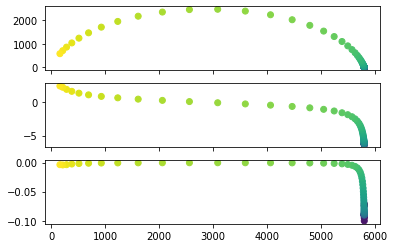

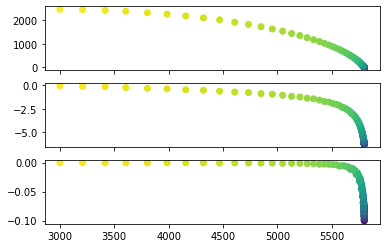

In [35]:

plot_derivatives(eis_data["Z_real"][rand_number], ders1, eis_data["freq"][rand_number])
plot_derivatives(eis_data["Z_real_values"][rand_number], ders2, eis_data["freq_interpolation"][rand_number])

In [36]:
eis_data["Z_real_d1_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_real_values, 2)[1], axis=1)    
eis_data["Z_real_d2_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_real_values, 2)[2], axis=1)
eis_data["Z_imag_d1_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_imag_values, 2)[1], axis=1)    
eis_data["Z_imag_d2_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_imag_values, 2)[2], axis=1)


In [37]:
for i in ["Z_real", "Z_imag","Z_real_d1", "Z_imag_d1","Z_real_d2", "Z_imag_d2"]:
    inter_p_col = f'{i}_values'
    (eis_data[f'{inter_p_col}_min'], eis_data[f'{inter_p_col}_Q1'],
    eis_data[f'{inter_p_col}_median'], eis_data[f'{inter_p_col}_Q3'],
    eis_data[f'{inter_p_col}_max'],eis_data[f'{inter_p_col}_mean'],eis_data[f'{inter_p_col}_std']) = extract_boxplot_data_from_columns(eis_data[inter_p_col])


/tmp/ipykernel_128/3093879081.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_sample = np.percentile(cmp, 25, interpolation = 'midpoint')
/tmp/ipykernel_128/3093879081.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_sample = np.percentile(cmp, 25, interpolation = 'midpoint')
/tmp/ipykernel_128/3093879081.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_sample = n

In [38]:
eis_data

,freq,Z,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed,freq_interpolation,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values,Z_real_d1_values,Z_real_d2_values,Z_imag_d1_values,Z_imag_d2_values,Z_real_values_min,Z_real_values_Q1,Z_real_values_median,Z_real_values_Q3,Z_real_values_max,Z_real_values_mean,Z_real_values_std,Z_imag_values_min,Z_imag_values_Q1,Z_imag_values_median,Z_imag_values_Q3,Z_imag_values_max,Z_imag_values_mean,Z_imag_values_std,Z_real_d1_values_min,Z_real_d1_values_Q1,Z_real_d1_values_median,Z_real_d1_values_Q3,Z_real_d1_values_max,Z_real_d1_values_mean,Z_real_d1_values_std,Z_imag_d1_values_min,Z_imag_d1_values_Q1,Z_imag_d1_values_median,Z_imag_d1_values_Q3,Z_imag_d1_values_max,Z_imag_d1_values_mean,Z_imag_d1_values_std,Z_real_d2_values_min,Z_real_d2_values_Q1,Z_real_d2_values_median,Z_real_d2_values_Q3,Z_real_d2_values_max,Z_real_d2_values_mean,Z_real_d2_values_std,Z_imag_d2_values_min,Z_imag_d2_values_Q1,Z_imag_d2_values_median,Z_imag_d2_values_Q3,Z_imag_d2_values_max,Z_imag_d2_values_mean,Z_imag_d2_values_std
0,"[0.0628318531, 0.0929806621, 0.137595871, 0.20...","[(107.98943481-1.91760783e-06j), (107.98943465...","[107.98943481, 107.98943465, 107.98943442, 107...","[-1.91760783e-06, -2.69814865e-06, -3.79637798...",0.062832,6.283185e+06,100.013482,107.989435,-4.504606,-0.000002,"[0.010911504272820777, 0.010911504272769015, 0...","[0.8957569931890013, 0.8957569931885488, 0.895...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[107.98940260071737, 107.989399873704, 107.989...",<scipy.interpolate._interpolate.interp1d objec...,"[-0.00015876287384220317, -0.00017203063017970...","[-2.796972200960951e-06, -2.7774757431035937e-...","[1.9996620222587015e-08, 1.8220179291209568e-0...","[-1.3608127518747785e-05, -1.3512725269549474e...","[9.784969965092041e-08, 8.915700201900268e-08,...",107.870340,107.975367,107.987625,107.989197,107.989403,107.975329,0.025666,-0.471861,-0.066130,-0.008753,-0.001156,-0.000159,-0.061304,0.106549,-2.796972e-06,-2.134363e-06,-1.593101e-06,-1.233298e-06,-1.150083e-06,-1.716127e-06,5.143350e-07,-1.360813e-05,-1.036091e-05,-7.667193e-06,-5.641959e-06,-4.004700e-06,-8.054206e-06,2.798454e-06,-2.171312e-12,3.294709e-12,1.232192e-10,1.782557e-09,3.881876e-08,3.149177e-09,6.984181e-09,-4.504047e-22,4.221721e-11,6.411848e-10,8.810193e-09,1.898517e-07,1.544445e-08,3.416059e-08
1,"[6.28318531, 8.44794926, 11.3585456, 15.271938...","[(1374.66297214-5.24696677j), (1374.10472855-6...","[1374.66297214, 1374.10472855, 1373.40544826, ...","[-5.24696677, -6.53835458, -8.14579098, -10.14...",6.283185,1.253660e+07,119.329175,1374.662972,-416.833717,-5.078472,"[0.011321292474880297, 0.011321111874567497, 0...","[0.8957539516488332, 0.8957532030621725, 0.895...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[1373.7318432836212, 1373.4975993107569, 1373....",<scipy.interpolate._interpolate.interp1d objec...,"[-7.395506367019335, -7.933963254547072, -8.49...","[-0.2402532705719115, -0.23481782225016753, -0...","[0.005574889378605603, 0.006564648597792332, 0...","[-0.5522704670205135, -0.5384237682649452, -0....","[0.014201922132598157, 0.016723314469716536, 0...",215.767382,693.558933,1253.356545,1358.682095,1373.731843,1028.639172,402.397302,-416.643746,-324.046122,-175.730771,-39.629433,-7.395506,-187.035011,144.044366,-2.402533e-01,-1.459992e-01,-1.047704e-01,-3.273765e-02,-9.112542e-04,-9.893499e-02,6.814650e-02,-5.522705e-01,-2.916780e-01,-1.139184e-01,1.107110e-03,5.678774e-03,-1.640634e-01,1.700283e-01,-3.661310e-23,3.410950e-06,1.496029e-05,2.630098e-04,6.564649e-03,5.048001e-04,1.199550e-03,-1.892099e-07,1.392816e-06,6.182518e-05,8.874295e-04,1.672331e-02,1.362847e-03,3.086179e-03
2,"[0.628318531, 0.930918317, 1.37925092, 2.04350...","[(0.30615453-0.00051099j), (0.30615039-0.00075...","[0.30615453, 0.30615039, 0.30614129,

Se intentó por
    